In [1]:
import numpy as np
from sympy import solve
import matplotlib.pyplot as plt
import seaborn as sns

## $R_o$

Determing updated $R_o$ from prevalance and herd immunity through time

In [45]:
def r0(prevalence, r0):
    update_r0 = ((1 - prevalence) * r0)
    update_preval = 1 - prevalence
    return update_r0, update_preval

In [46]:
proport = np.arange(0.1, .99, 0.1)
r_nought = 2
update_r0, update_preval = r0(proport, r_nought)

In [47]:
for r0, can_infect in zip(update_r0, update_preval):
    print('When r0 is ', round(r0, 2), ', the person infects, on average, ', round(can_infect, 2), 'of the original 1:2')

When r0 is  1.8 , the person infects, on average,  0.9 of the original 1:2
When r0 is  1.6 , the person infects, on average,  0.8 of the original 1:2
When r0 is  1.4 , the person infects, on average,  0.7 of the original 1:2
When r0 is  1.2 , the person infects, on average,  0.6 of the original 1:2
When r0 is  1.0 , the person infects, on average,  0.5 of the original 1:2
When r0 is  0.8 , the person infects, on average,  0.4 of the original 1:2
When r0 is  0.6 , the person infects, on average,  0.3 of the original 1:2
When r0 is  0.4 , the person infects, on average,  0.2 of the original 1:2
When r0 is  0.2 , the person infects, on average,  0.1 of the original 1:2


## Difference Equation - A recursive algorithm for the number of infected people

Every infection decreases the number of susceptible people:

$S(tomorrow) = S(today) - 0.2 * I(today) * S(today) / 1,000,000$

which increases the number of infected people:

$I(tomorrow) = I(today) + 0.2 * I(today) * S(today) / 1,000,000$

In [10]:
def disease(susceptible_today, infected_today, population):
    if infected_today <= 1:
        return [infected_today]
    else:
        susceptible_tom = susceptible_today - 0.2 * infected_today * susceptible_today / population
        infected_tom = infected_today + 0.2 * infected_today * susceptible_today / population - 0.1 * infected_today
    
        return disease(susceptible_tom, infected_tom, population) + [infected_today]
 

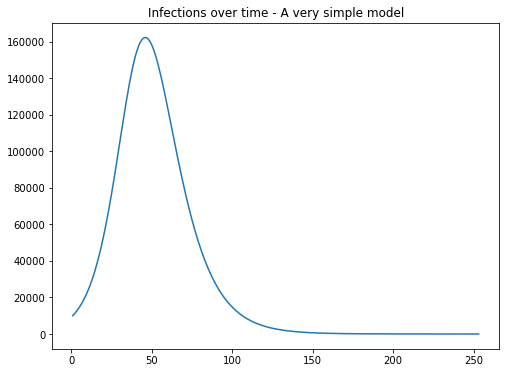

In [58]:
infected = list(disease(990000, 10000, 1000000))
infected.reverse()
days = np.arange(1, 254) ## 253 day time frame
plt.figure(figsize=(8, 6))
sns.lineplot(x=days, y=infected)
plt.title('Infections over time - A very simple model')
plt.show()


At day ~45, $R_o$ reaches the critical threshold of 1 with exponential decay happening thereafter. Which makes sense as the computations of the updated $R_o$ above suggest when $R_o = 1$, the infected people now infect, on average, 0.5 people of the original 1:2. This happens as the number of infected people increases, the number of susceptible people decreases - the disease "runs" out of new people to infect. This "running out of people to infect" is the reason for the updated $R_o$.